# Introduction

# Importing data

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
sns.set_style("darkgrid")

import pandas as pd
from datetime import datetime,timedelta


#os.chdir('../Python')
#from eda_functions import *
#from eda_func_2 import *
from utilities import *

os.chdir('../Animated_EDA_plots')
from eda_func_3 import *
os.chdir('..')

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [4]:
data = load("Generated Data/atp_data")
#data = load("../Generated Data/atp_data")

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54908 entries, 0 to 54907
Data columns (total 25 columns):
ATP                54908 non-null int64
Location           54908 non-null object
Tournament         54908 non-null object
Date               54908 non-null datetime64[ns]
Series             54908 non-null object
Court              54908 non-null object
Surface            54908 non-null object
Round              54908 non-null object
Best of            54908 non-null int64
Winner             54908 non-null object
Loser              54908 non-null object
WRank              54908 non-null int64
LRank              54908 non-null int64
Wsets              54663 non-null float64
Lsets              54662 non-null float64
Comment            54908 non-null object
PSW                39938 non-null float64
PSL                39938 non-null float64
B365W              46240 non-null float64
B365L              46263 non-null float64
elo_winner         54908 non-null float64
elo_loser          

In [8]:
#data = load("Generated Data/atp_data")
#data = load("../Generated Data/atp_data")

#data.sort_values(by=['Date'], inplace=True, ascending=True)
#data.reset_index(drop = True, inplace = True)

beg_year = 2011
beg_year = 2009
#dat = data[(data.Date.dt.year >= beg_year)]
dat = data.copy(deep = True)
dat.drop(['PSL','PSW'],axis = 1, inplace = True)
dat.dropna(inplace = True)

dat['elo_diff'] = dat.elo_winner - dat.elo_loser
dat['rank_diff'] = dat.LRank - dat.WRank
#dat['smaller_ps'] = dat[['PSL','PSW']].min(axis=1)
dat['smaller_b365'] = dat[['B365W','B365L']].min(axis=1)

In [2]:
#dat.Date.iloc[1]
#data[data.Date.dt.year == 2009]
#dat[dat.Date.dt.year == 2009]

In [1]:
# data.groupby(pd.Grouper(key='Date',freq='Y')).agg('count')

# Checking crossover 1

## enddate rising

In [25]:
# resolution for better betting
#resolution_elo = 60
#resolution_rank = 36

#x = np.linspace(0, 600, resolution_elo) # elo-scores
#y = np.linspace(0, 120, resolution_rank) # ATP-ranking

# resolution for crossover 1
resolution_elo = 31
resolution_rank = 36

x = np.linspace(0, 300, resolution_elo) # elo-scores
y = np.linspace(0, 120, resolution_rank) # ATP-ranking


start_year = beg_year
end_year = 2019

period_count = 0

for yr in range(start_year,end_year+1):
    for mo in range(1,13,1):
        period_count += 1

print(period_count)

X, Y = np.meshgrid(x, y)
Z_res_1 = np.zeros((resolution_rank,resolution_elo,period_count))
Z_res_2 = np.zeros((resolution_rank,resolution_elo,period_count))
Z_res_3 = np.zeros((resolution_rank,resolution_elo,period_count))
#Z = np.zeros(X.shape)

132


In [15]:
Z_res_1.shape
#Z.shape

(36, 31, 132)

In [26]:
# -- Parameters -- 
rnd = None
thr = 1.08
# ----------------
end_dates = []
start_date=datetime(beg_year,1,1)
counter = -1
for yr in range(start_year,end_year+1,1):
    for mo in range(1,13,1):
        counter += 1
        end_date=datetime(yr,mo,1) #end date of analysis
        print(end_date)
        #start_index = dat[dat.Date>=start_date].index[0]
        #end_index = dat[dat.Date<=end_date].index[0]
        #indices = range(start_index,end_index+1)
        #print(f'start index: {start_index}')
        #print(f'end index: {end_index}')
        #print(f'length: {end_index - start_index}')
        
        dats =dat[(dat.Date.dt.year == yr)&(dat.Date.dt.month == mo)].copy(deep = True)
        #dats = dat.iloc[indices,:].reset_index(drop=True)
        
        print(f'dats shape: {dats.shape}')
              
        Z = np.zeros(X.shape)
        Z1 = np.zeros(X.shape)
        Z2 = np.zeros(X.shape)
        
        for i,elo in enumerate(x):
            print(f'Elo iter {i} of {resolution_elo} ; Value: {elo}')
            for j, rank in enumerate(y):
                tmp = gain_crossover(dats, 
                                    elo_diff = elo, 
                                    rank_diff = rank, 
                                    threshold = thr, 
                                    tax = 0.05, 
                                    round_ = rnd,
                                    limit = 2000, 
                                    verbose=0)

                Z[j,i] = tmp[1]
                Z1[j,i] = tmp[0]
                Z2[j,i] = tmp[2]
        
        end_dates.append(end_date)
        Z_res_1[:,:,counter] = Z
        Z_res_2[:,:,counter] = Z1
        Z_res_3[:,:,counter] = Z2
        

2009-01-01 00:00:00
dats shape: (269, 25)
Elo iter 0 of 31 ; Value: 0.0
Elo iter 1 of 31 ; Value: 10.0
Elo iter 2 of 31 ; Value: 20.0
Elo iter 3 of 31 ; Value: 30.0
Elo iter 4 of 31 ; Value: 40.0
Elo iter 5 of 31 ; Value: 50.0
Elo iter 6 of 31 ; Value: 60.0
Elo iter 7 of 31 ; Value: 70.0
Elo iter 8 of 31 ; Value: 80.0
Elo iter 9 of 31 ; Value: 90.0
Elo iter 10 of 31 ; Value: 100.0
Elo iter 11 of 31 ; Value: 110.0
Elo iter 12 of 31 ; Value: 120.0
Elo iter 13 of 31 ; Value: 130.0
Elo iter 14 of 31 ; Value: 140.0
Elo iter 15 of 31 ; Value: 150.0
Elo iter 16 of 31 ; Value: 160.0
Elo iter 17 of 31 ; Value: 170.0
Elo iter 18 of 31 ; Value: 180.0
Elo iter 19 of 31 ; Value: 190.0
Elo iter 20 of 31 ; Value: 200.0
Elo iter 21 of 31 ; Value: 210.0
Elo iter 22 of 31 ; Value: 220.0
Elo iter 23 of 31 ; Value: 230.0
Elo iter 24 of 31 ; Value: 240.0
Elo iter 25 of 31 ; Value: 250.0
Elo iter 26 of 31 ; Value: 260.0
Elo iter 27 of 31 ; Value: 270.0
Elo iter 28 of 31 ; Value: 280.0
Elo iter 29 of 31 ; Va

Elo iter 27 of 31 ; Value: 270.0
Elo iter 28 of 31 ; Value: 280.0
Elo iter 29 of 31 ; Value: 290.0
Elo iter 30 of 31 ; Value: 300.0
2009-09-01 00:00:00
dats shape: (190, 25)
Elo iter 0 of 31 ; Value: 0.0
Elo iter 1 of 31 ; Value: 10.0
Elo iter 2 of 31 ; Value: 20.0
Elo iter 3 of 31 ; Value: 30.0
Elo iter 4 of 31 ; Value: 40.0
Elo iter 5 of 31 ; Value: 50.0
Elo iter 6 of 31 ; Value: 60.0
Elo iter 7 of 31 ; Value: 70.0
Elo iter 8 of 31 ; Value: 80.0
Elo iter 9 of 31 ; Value: 90.0
Elo iter 10 of 31 ; Value: 100.0
Elo iter 11 of 31 ; Value: 110.0
Elo iter 12 of 31 ; Value: 120.0
Elo iter 13 of 31 ; Value: 130.0
Elo iter 14 of 31 ; Value: 140.0
Elo iter 15 of 31 ; Value: 150.0
Elo iter 16 of 31 ; Value: 160.0
Elo iter 17 of 31 ; Value: 170.0
Elo iter 18 of 31 ; Value: 180.0
Elo iter 19 of 31 ; Value: 190.0
Elo iter 20 of 31 ; Value: 200.0
Elo iter 21 of 31 ; Value: 210.0
Elo iter 22 of 31 ; Value: 220.0
Elo iter 23 of 31 ; Value: 230.0
Elo iter 24 of 31 ; Value: 240.0
Elo iter 25 of 31 ; Va

Elo iter 23 of 31 ; Value: 230.0
Elo iter 24 of 31 ; Value: 240.0
Elo iter 25 of 31 ; Value: 250.0
Elo iter 26 of 31 ; Value: 260.0
Elo iter 27 of 31 ; Value: 270.0
Elo iter 28 of 31 ; Value: 280.0
Elo iter 29 of 31 ; Value: 290.0
Elo iter 30 of 31 ; Value: 300.0
2010-05-01 00:00:00
dats shape: (284, 25)
Elo iter 0 of 31 ; Value: 0.0
Elo iter 1 of 31 ; Value: 10.0
Elo iter 2 of 31 ; Value: 20.0
Elo iter 3 of 31 ; Value: 30.0
Elo iter 4 of 31 ; Value: 40.0
Elo iter 5 of 31 ; Value: 50.0
Elo iter 6 of 31 ; Value: 60.0
Elo iter 7 of 31 ; Value: 70.0
Elo iter 8 of 31 ; Value: 80.0
Elo iter 9 of 31 ; Value: 90.0
Elo iter 10 of 31 ; Value: 100.0
Elo iter 11 of 31 ; Value: 110.0
Elo iter 12 of 31 ; Value: 120.0
Elo iter 13 of 31 ; Value: 130.0
Elo iter 14 of 31 ; Value: 140.0
Elo iter 15 of 31 ; Value: 150.0
Elo iter 16 of 31 ; Value: 160.0
Elo iter 17 of 31 ; Value: 170.0
Elo iter 18 of 31 ; Value: 180.0
Elo iter 19 of 31 ; Value: 190.0
Elo iter 20 of 31 ; Value: 200.0
Elo iter 21 of 31 ; Va

Elo iter 19 of 31 ; Value: 190.0
Elo iter 20 of 31 ; Value: 200.0
Elo iter 21 of 31 ; Value: 210.0
Elo iter 22 of 31 ; Value: 220.0
Elo iter 23 of 31 ; Value: 230.0
Elo iter 24 of 31 ; Value: 240.0
Elo iter 25 of 31 ; Value: 250.0
Elo iter 26 of 31 ; Value: 260.0
Elo iter 27 of 31 ; Value: 270.0
Elo iter 28 of 31 ; Value: 280.0
Elo iter 29 of 31 ; Value: 290.0
Elo iter 30 of 31 ; Value: 300.0
2011-01-01 00:00:00
dats shape: (281, 25)
Elo iter 0 of 31 ; Value: 0.0
Elo iter 1 of 31 ; Value: 10.0
Elo iter 2 of 31 ; Value: 20.0
Elo iter 3 of 31 ; Value: 30.0
Elo iter 4 of 31 ; Value: 40.0
Elo iter 5 of 31 ; Value: 50.0
Elo iter 6 of 31 ; Value: 60.0
Elo iter 7 of 31 ; Value: 70.0
Elo iter 8 of 31 ; Value: 80.0
Elo iter 9 of 31 ; Value: 90.0
Elo iter 10 of 31 ; Value: 100.0
Elo iter 11 of 31 ; Value: 110.0
Elo iter 12 of 31 ; Value: 120.0
Elo iter 13 of 31 ; Value: 130.0
Elo iter 14 of 31 ; Value: 140.0
Elo iter 15 of 31 ; Value: 150.0
Elo iter 16 of 31 ; Value: 160.0
Elo iter 17 of 31 ; Va

Elo iter 15 of 31 ; Value: 150.0
Elo iter 16 of 31 ; Value: 160.0
Elo iter 17 of 31 ; Value: 170.0
Elo iter 18 of 31 ; Value: 180.0
Elo iter 19 of 31 ; Value: 190.0
Elo iter 20 of 31 ; Value: 200.0
Elo iter 21 of 31 ; Value: 210.0
Elo iter 22 of 31 ; Value: 220.0
Elo iter 23 of 31 ; Value: 230.0
Elo iter 24 of 31 ; Value: 240.0
Elo iter 25 of 31 ; Value: 250.0
Elo iter 26 of 31 ; Value: 260.0
Elo iter 27 of 31 ; Value: 270.0
Elo iter 28 of 31 ; Value: 280.0
Elo iter 29 of 31 ; Value: 290.0
Elo iter 30 of 31 ; Value: 300.0
2011-09-01 00:00:00
dats shape: (166, 25)
Elo iter 0 of 31 ; Value: 0.0
Elo iter 1 of 31 ; Value: 10.0
Elo iter 2 of 31 ; Value: 20.0
Elo iter 3 of 31 ; Value: 30.0
Elo iter 4 of 31 ; Value: 40.0
Elo iter 5 of 31 ; Value: 50.0
Elo iter 6 of 31 ; Value: 60.0
Elo iter 7 of 31 ; Value: 70.0
Elo iter 8 of 31 ; Value: 80.0
Elo iter 9 of 31 ; Value: 90.0
Elo iter 10 of 31 ; Value: 100.0
Elo iter 11 of 31 ; Value: 110.0
Elo iter 12 of 31 ; Value: 120.0
Elo iter 13 of 31 ; Va

Elo iter 11 of 31 ; Value: 110.0
Elo iter 12 of 31 ; Value: 120.0
Elo iter 13 of 31 ; Value: 130.0
Elo iter 14 of 31 ; Value: 140.0
Elo iter 15 of 31 ; Value: 150.0
Elo iter 16 of 31 ; Value: 160.0
Elo iter 17 of 31 ; Value: 170.0
Elo iter 18 of 31 ; Value: 180.0
Elo iter 19 of 31 ; Value: 190.0
Elo iter 20 of 31 ; Value: 200.0
Elo iter 21 of 31 ; Value: 210.0
Elo iter 22 of 31 ; Value: 220.0
Elo iter 23 of 31 ; Value: 230.0
Elo iter 24 of 31 ; Value: 240.0
Elo iter 25 of 31 ; Value: 250.0
Elo iter 26 of 31 ; Value: 260.0
Elo iter 27 of 31 ; Value: 270.0
Elo iter 28 of 31 ; Value: 280.0
Elo iter 29 of 31 ; Value: 290.0
Elo iter 30 of 31 ; Value: 300.0
2012-05-01 00:00:00
dats shape: (303, 25)
Elo iter 0 of 31 ; Value: 0.0
Elo iter 1 of 31 ; Value: 10.0
Elo iter 2 of 31 ; Value: 20.0
Elo iter 3 of 31 ; Value: 30.0
Elo iter 4 of 31 ; Value: 40.0
Elo iter 5 of 31 ; Value: 50.0
Elo iter 6 of 31 ; Value: 60.0
Elo iter 7 of 31 ; Value: 70.0
Elo iter 8 of 31 ; Value: 80.0
Elo iter 9 of 31 ; V

Elo iter 6 of 31 ; Value: 60.0
Elo iter 7 of 31 ; Value: 70.0
Elo iter 8 of 31 ; Value: 80.0
Elo iter 9 of 31 ; Value: 90.0
Elo iter 10 of 31 ; Value: 100.0
Elo iter 11 of 31 ; Value: 110.0
Elo iter 12 of 31 ; Value: 120.0
Elo iter 13 of 31 ; Value: 130.0
Elo iter 14 of 31 ; Value: 140.0
Elo iter 15 of 31 ; Value: 150.0
Elo iter 16 of 31 ; Value: 160.0
Elo iter 17 of 31 ; Value: 170.0
Elo iter 18 of 31 ; Value: 180.0
Elo iter 19 of 31 ; Value: 190.0
Elo iter 20 of 31 ; Value: 200.0
Elo iter 21 of 31 ; Value: 210.0
Elo iter 22 of 31 ; Value: 220.0
Elo iter 23 of 31 ; Value: 230.0
Elo iter 24 of 31 ; Value: 240.0
Elo iter 25 of 31 ; Value: 250.0
Elo iter 26 of 31 ; Value: 260.0
Elo iter 27 of 31 ; Value: 270.0
Elo iter 28 of 31 ; Value: 280.0
Elo iter 29 of 31 ; Value: 290.0
Elo iter 30 of 31 ; Value: 300.0
2013-01-01 00:00:00
dats shape: (252, 25)
Elo iter 0 of 31 ; Value: 0.0
Elo iter 1 of 31 ; Value: 10.0
Elo iter 2 of 31 ; Value: 20.0
Elo iter 3 of 31 ; Value: 30.0
Elo iter 4 of 31 ;

Elo iter 1 of 31 ; Value: 10.0
Elo iter 2 of 31 ; Value: 20.0
Elo iter 3 of 31 ; Value: 30.0
Elo iter 4 of 31 ; Value: 40.0
Elo iter 5 of 31 ; Value: 50.0
Elo iter 6 of 31 ; Value: 60.0
Elo iter 7 of 31 ; Value: 70.0
Elo iter 8 of 31 ; Value: 80.0
Elo iter 9 of 31 ; Value: 90.0
Elo iter 10 of 31 ; Value: 100.0
Elo iter 11 of 31 ; Value: 110.0
Elo iter 12 of 31 ; Value: 120.0
Elo iter 13 of 31 ; Value: 130.0
Elo iter 14 of 31 ; Value: 140.0
Elo iter 15 of 31 ; Value: 150.0
Elo iter 16 of 31 ; Value: 160.0
Elo iter 17 of 31 ; Value: 170.0
Elo iter 18 of 31 ; Value: 180.0
Elo iter 19 of 31 ; Value: 190.0
Elo iter 20 of 31 ; Value: 200.0
Elo iter 21 of 31 ; Value: 210.0
Elo iter 22 of 31 ; Value: 220.0
Elo iter 23 of 31 ; Value: 230.0
Elo iter 24 of 31 ; Value: 240.0
Elo iter 25 of 31 ; Value: 250.0
Elo iter 26 of 31 ; Value: 260.0
Elo iter 27 of 31 ; Value: 270.0
Elo iter 28 of 31 ; Value: 280.0
Elo iter 29 of 31 ; Value: 290.0
Elo iter 30 of 31 ; Value: 300.0
2013-09-01 00:00:00
dats sha

Elo iter 29 of 31 ; Value: 290.0
Elo iter 30 of 31 ; Value: 300.0
2014-04-01 00:00:00
dats shape: (210, 25)
Elo iter 0 of 31 ; Value: 0.0
Elo iter 1 of 31 ; Value: 10.0
Elo iter 2 of 31 ; Value: 20.0
Elo iter 3 of 31 ; Value: 30.0
Elo iter 4 of 31 ; Value: 40.0
Elo iter 5 of 31 ; Value: 50.0
Elo iter 6 of 31 ; Value: 60.0
Elo iter 7 of 31 ; Value: 70.0
Elo iter 8 of 31 ; Value: 80.0
Elo iter 9 of 31 ; Value: 90.0
Elo iter 10 of 31 ; Value: 100.0
Elo iter 11 of 31 ; Value: 110.0
Elo iter 12 of 31 ; Value: 120.0
Elo iter 13 of 31 ; Value: 130.0
Elo iter 14 of 31 ; Value: 140.0
Elo iter 15 of 31 ; Value: 150.0
Elo iter 16 of 31 ; Value: 160.0
Elo iter 17 of 31 ; Value: 170.0
Elo iter 18 of 31 ; Value: 180.0
Elo iter 19 of 31 ; Value: 190.0
Elo iter 20 of 31 ; Value: 200.0
Elo iter 21 of 31 ; Value: 210.0
Elo iter 22 of 31 ; Value: 220.0
Elo iter 23 of 31 ; Value: 230.0
Elo iter 24 of 31 ; Value: 240.0
Elo iter 25 of 31 ; Value: 250.0
Elo iter 26 of 31 ; Value: 260.0
Elo iter 27 of 31 ; Va

Elo iter 25 of 31 ; Value: 250.0
Elo iter 26 of 31 ; Value: 260.0
Elo iter 27 of 31 ; Value: 270.0
Elo iter 28 of 31 ; Value: 280.0
Elo iter 29 of 31 ; Value: 290.0
Elo iter 30 of 31 ; Value: 300.0
2014-12-01 00:00:00
dats shape: (0, 25)
Elo iter 0 of 31 ; Value: 0.0
Elo iter 1 of 31 ; Value: 10.0
Elo iter 2 of 31 ; Value: 20.0
Elo iter 3 of 31 ; Value: 30.0
Elo iter 4 of 31 ; Value: 40.0
Elo iter 5 of 31 ; Value: 50.0
Elo iter 6 of 31 ; Value: 60.0
Elo iter 7 of 31 ; Value: 70.0
Elo iter 8 of 31 ; Value: 80.0
Elo iter 9 of 31 ; Value: 90.0
Elo iter 10 of 31 ; Value: 100.0
Elo iter 11 of 31 ; Value: 110.0
Elo iter 12 of 31 ; Value: 120.0
Elo iter 13 of 31 ; Value: 130.0
Elo iter 14 of 31 ; Value: 140.0
Elo iter 15 of 31 ; Value: 150.0
Elo iter 16 of 31 ; Value: 160.0
Elo iter 17 of 31 ; Value: 170.0
Elo iter 18 of 31 ; Value: 180.0
Elo iter 19 of 31 ; Value: 190.0
Elo iter 20 of 31 ; Value: 200.0
Elo iter 21 of 31 ; Value: 210.0
Elo iter 22 of 31 ; Value: 220.0
Elo iter 23 of 31 ; Valu

Elo iter 21 of 31 ; Value: 210.0
Elo iter 22 of 31 ; Value: 220.0
Elo iter 23 of 31 ; Value: 230.0
Elo iter 24 of 31 ; Value: 240.0
Elo iter 25 of 31 ; Value: 250.0
Elo iter 26 of 31 ; Value: 260.0
Elo iter 27 of 31 ; Value: 270.0
Elo iter 28 of 31 ; Value: 280.0
Elo iter 29 of 31 ; Value: 290.0
Elo iter 30 of 31 ; Value: 300.0
2015-08-01 00:00:00
dats shape: (269, 25)
Elo iter 0 of 31 ; Value: 0.0
Elo iter 1 of 31 ; Value: 10.0
Elo iter 2 of 31 ; Value: 20.0
Elo iter 3 of 31 ; Value: 30.0
Elo iter 4 of 31 ; Value: 40.0
Elo iter 5 of 31 ; Value: 50.0
Elo iter 6 of 31 ; Value: 60.0
Elo iter 7 of 31 ; Value: 70.0
Elo iter 8 of 31 ; Value: 80.0
Elo iter 9 of 31 ; Value: 90.0
Elo iter 10 of 31 ; Value: 100.0
Elo iter 11 of 31 ; Value: 110.0
Elo iter 12 of 31 ; Value: 120.0
Elo iter 13 of 31 ; Value: 130.0
Elo iter 14 of 31 ; Value: 140.0
Elo iter 15 of 31 ; Value: 150.0
Elo iter 16 of 31 ; Value: 160.0
Elo iter 17 of 31 ; Value: 170.0
Elo iter 18 of 31 ; Value: 180.0
Elo iter 19 of 31 ; Va

Elo iter 17 of 31 ; Value: 170.0
Elo iter 18 of 31 ; Value: 180.0
Elo iter 19 of 31 ; Value: 190.0
Elo iter 20 of 31 ; Value: 200.0
Elo iter 21 of 31 ; Value: 210.0
Elo iter 22 of 31 ; Value: 220.0
Elo iter 23 of 31 ; Value: 230.0
Elo iter 24 of 31 ; Value: 240.0
Elo iter 25 of 31 ; Value: 250.0
Elo iter 26 of 31 ; Value: 260.0
Elo iter 27 of 31 ; Value: 270.0
Elo iter 28 of 31 ; Value: 280.0
Elo iter 29 of 31 ; Value: 290.0
Elo iter 30 of 31 ; Value: 300.0
2016-04-01 00:00:00
dats shape: (264, 25)
Elo iter 0 of 31 ; Value: 0.0
Elo iter 1 of 31 ; Value: 10.0
Elo iter 2 of 31 ; Value: 20.0
Elo iter 3 of 31 ; Value: 30.0
Elo iter 4 of 31 ; Value: 40.0
Elo iter 5 of 31 ; Value: 50.0
Elo iter 6 of 31 ; Value: 60.0
Elo iter 7 of 31 ; Value: 70.0
Elo iter 8 of 31 ; Value: 80.0
Elo iter 9 of 31 ; Value: 90.0
Elo iter 10 of 31 ; Value: 100.0
Elo iter 11 of 31 ; Value: 110.0
Elo iter 12 of 31 ; Value: 120.0
Elo iter 13 of 31 ; Value: 130.0
Elo iter 14 of 31 ; Value: 140.0
Elo iter 15 of 31 ; Va

Elo iter 13 of 31 ; Value: 130.0
Elo iter 14 of 31 ; Value: 140.0
Elo iter 15 of 31 ; Value: 150.0
Elo iter 16 of 31 ; Value: 160.0
Elo iter 17 of 31 ; Value: 170.0
Elo iter 18 of 31 ; Value: 180.0
Elo iter 19 of 31 ; Value: 190.0
Elo iter 20 of 31 ; Value: 200.0
Elo iter 21 of 31 ; Value: 210.0
Elo iter 22 of 31 ; Value: 220.0
Elo iter 23 of 31 ; Value: 230.0
Elo iter 24 of 31 ; Value: 240.0
Elo iter 25 of 31 ; Value: 250.0
Elo iter 26 of 31 ; Value: 260.0
Elo iter 27 of 31 ; Value: 270.0
Elo iter 28 of 31 ; Value: 280.0
Elo iter 29 of 31 ; Value: 290.0
Elo iter 30 of 31 ; Value: 300.0
2016-12-01 00:00:00
dats shape: (0, 25)
Elo iter 0 of 31 ; Value: 0.0
Elo iter 1 of 31 ; Value: 10.0
Elo iter 2 of 31 ; Value: 20.0
Elo iter 3 of 31 ; Value: 30.0
Elo iter 4 of 31 ; Value: 40.0
Elo iter 5 of 31 ; Value: 50.0
Elo iter 6 of 31 ; Value: 60.0
Elo iter 7 of 31 ; Value: 70.0
Elo iter 8 of 31 ; Value: 80.0
Elo iter 9 of 31 ; Value: 90.0
Elo iter 10 of 31 ; Value: 100.0
Elo iter 11 of 31 ; Valu

Elo iter 9 of 31 ; Value: 90.0
Elo iter 10 of 31 ; Value: 100.0
Elo iter 11 of 31 ; Value: 110.0
Elo iter 12 of 31 ; Value: 120.0
Elo iter 13 of 31 ; Value: 130.0
Elo iter 14 of 31 ; Value: 140.0
Elo iter 15 of 31 ; Value: 150.0
Elo iter 16 of 31 ; Value: 160.0
Elo iter 17 of 31 ; Value: 170.0
Elo iter 18 of 31 ; Value: 180.0
Elo iter 19 of 31 ; Value: 190.0
Elo iter 20 of 31 ; Value: 200.0
Elo iter 21 of 31 ; Value: 210.0
Elo iter 22 of 31 ; Value: 220.0
Elo iter 23 of 31 ; Value: 230.0
Elo iter 24 of 31 ; Value: 240.0
Elo iter 25 of 31 ; Value: 250.0
Elo iter 26 of 31 ; Value: 260.0
Elo iter 27 of 31 ; Value: 270.0
Elo iter 28 of 31 ; Value: 280.0
Elo iter 29 of 31 ; Value: 290.0
Elo iter 30 of 31 ; Value: 300.0
2017-08-01 00:00:00
dats shape: (340, 25)
Elo iter 0 of 31 ; Value: 0.0
Elo iter 1 of 31 ; Value: 10.0
Elo iter 2 of 31 ; Value: 20.0
Elo iter 3 of 31 ; Value: 30.0
Elo iter 4 of 31 ; Value: 40.0
Elo iter 5 of 31 ; Value: 50.0
Elo iter 6 of 31 ; Value: 60.0
Elo iter 7 of 31 ;

Elo iter 4 of 31 ; Value: 40.0
Elo iter 5 of 31 ; Value: 50.0
Elo iter 6 of 31 ; Value: 60.0
Elo iter 7 of 31 ; Value: 70.0
Elo iter 8 of 31 ; Value: 80.0
Elo iter 9 of 31 ; Value: 90.0
Elo iter 10 of 31 ; Value: 100.0
Elo iter 11 of 31 ; Value: 110.0
Elo iter 12 of 31 ; Value: 120.0
Elo iter 13 of 31 ; Value: 130.0
Elo iter 14 of 31 ; Value: 140.0
Elo iter 15 of 31 ; Value: 150.0
Elo iter 16 of 31 ; Value: 160.0
Elo iter 17 of 31 ; Value: 170.0
Elo iter 18 of 31 ; Value: 180.0
Elo iter 19 of 31 ; Value: 190.0
Elo iter 20 of 31 ; Value: 200.0
Elo iter 21 of 31 ; Value: 210.0
Elo iter 22 of 31 ; Value: 220.0
Elo iter 23 of 31 ; Value: 230.0
Elo iter 24 of 31 ; Value: 240.0
Elo iter 25 of 31 ; Value: 250.0
Elo iter 26 of 31 ; Value: 260.0
Elo iter 27 of 31 ; Value: 270.0
Elo iter 28 of 31 ; Value: 280.0
Elo iter 29 of 31 ; Value: 290.0
Elo iter 30 of 31 ; Value: 300.0
2018-04-01 00:00:00
dats shape: (198, 25)
Elo iter 0 of 31 ; Value: 0.0
Elo iter 1 of 31 ; Value: 10.0
Elo iter 2 of 31 ;

Elo iter 1 of 31 ; Value: 10.0
Elo iter 2 of 31 ; Value: 20.0
Elo iter 3 of 31 ; Value: 30.0
Elo iter 4 of 31 ; Value: 40.0
Elo iter 5 of 31 ; Value: 50.0
Elo iter 6 of 31 ; Value: 60.0
Elo iter 7 of 31 ; Value: 70.0
Elo iter 8 of 31 ; Value: 80.0
Elo iter 9 of 31 ; Value: 90.0
Elo iter 10 of 31 ; Value: 100.0
Elo iter 11 of 31 ; Value: 110.0
Elo iter 12 of 31 ; Value: 120.0
Elo iter 13 of 31 ; Value: 130.0
Elo iter 14 of 31 ; Value: 140.0
Elo iter 15 of 31 ; Value: 150.0
Elo iter 16 of 31 ; Value: 160.0
Elo iter 17 of 31 ; Value: 170.0
Elo iter 18 of 31 ; Value: 180.0
Elo iter 19 of 31 ; Value: 190.0
Elo iter 20 of 31 ; Value: 200.0
Elo iter 21 of 31 ; Value: 210.0
Elo iter 22 of 31 ; Value: 220.0
Elo iter 23 of 31 ; Value: 230.0
Elo iter 24 of 31 ; Value: 240.0
Elo iter 25 of 31 ; Value: 250.0
Elo iter 26 of 31 ; Value: 260.0
Elo iter 27 of 31 ; Value: 270.0
Elo iter 28 of 31 ; Value: 280.0
Elo iter 29 of 31 ; Value: 290.0
Elo iter 30 of 31 ; Value: 300.0
2018-12-01 00:00:00
dats sha

Elo iter 29 of 31 ; Value: 290.0
Elo iter 30 of 31 ; Value: 300.0
2019-07-01 00:00:00
dats shape: (353, 25)
Elo iter 0 of 31 ; Value: 0.0
Elo iter 1 of 31 ; Value: 10.0
Elo iter 2 of 31 ; Value: 20.0
Elo iter 3 of 31 ; Value: 30.0
Elo iter 4 of 31 ; Value: 40.0
Elo iter 5 of 31 ; Value: 50.0
Elo iter 6 of 31 ; Value: 60.0
Elo iter 7 of 31 ; Value: 70.0
Elo iter 8 of 31 ; Value: 80.0
Elo iter 9 of 31 ; Value: 90.0
Elo iter 10 of 31 ; Value: 100.0
Elo iter 11 of 31 ; Value: 110.0
Elo iter 12 of 31 ; Value: 120.0
Elo iter 13 of 31 ; Value: 130.0
Elo iter 14 of 31 ; Value: 140.0
Elo iter 15 of 31 ; Value: 150.0
Elo iter 16 of 31 ; Value: 160.0
Elo iter 17 of 31 ; Value: 170.0
Elo iter 18 of 31 ; Value: 180.0
Elo iter 19 of 31 ; Value: 190.0
Elo iter 20 of 31 ; Value: 200.0
Elo iter 21 of 31 ; Value: 210.0
Elo iter 22 of 31 ; Value: 220.0
Elo iter 23 of 31 ; Value: 230.0
Elo iter 24 of 31 ; Value: 240.0
Elo iter 25 of 31 ; Value: 250.0
Elo iter 26 of 31 ; Value: 260.0
Elo iter 27 of 31 ; Va

In [27]:
with open('cross1_odd_tax.npy', 'wb') as f:
    np.save(f, Z_res_1)
    np.save(f, Z_res_2)
    np.save(f, Z_res_3)
    np.save(f, X)
    np.save(f, Y)
#with open('test.npy', 'rb') as f:
#    K_test1 = np.load(f)
#    K_test2 = np.load(f)


In [28]:
dump(end_dates,"cross1_odd_tax_end_dates")

## graph

In [34]:

dats =dat[(dat.Date.dt.year <= 2019)&(dat.Date.dt.month <= 12) & (dat.Date.dt.year >= 2009)].copy(deep = True)

In [16]:
dats.shape

(46004, 25)

In [35]:
checking_elo= 150
checking_rank = 100 
rnd = None
thr = 1.0
gain_data = gain_crossover(dats, 
                    elo_diff = checking_elo, 
                    rank_diff = checking_rank, 
                    threshold = thr, 
                    tax = 0.0, 
                    limit = 2000, 
                    round_=rnd,
                    verbose=1,
                    data_back=1,
                    rst_idx = 1)

thr = 1.08
gain_data2 = gain_crossover(dats, 
                    elo_diff = checking_elo, 
                    rank_diff = checking_rank, 
                    threshold = thr, 
                    tax = 0.0, 
                    limit = 2000, 
                    round_=rnd,
                    verbose=1,
                    data_back=1,
                    rst_idx = 1)

thr = 1.08
gain_data3 = gain_crossover(dats, 
                    elo_diff = checking_elo, 
                    rank_diff = checking_rank, 
                    threshold = thr, 
                    tax = 0.05, 
                    limit = 2000, 
                    round_=rnd,
                    verbose=1,
                    data_back=1,
                    rst_idx = 1)

/Users/mareknowaczewski/nf-may20/cap_new_2/capstone/Animated_EDA_plots/eda_func_3.py:210: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  won['B365W_taxed'] = won.B365W*(1-tax)
/Users/mareknowaczewski/nf-may20/cap_new_2/capstone/Animated_EDA_plots/eda_func_3.py:244: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  won['gain'] = won.B365W_taxed - 1
/Users/mareknowaczewski/nf-may20/cap_new_2/capstone/Animated_EDA_plots/eda_func_3.py:245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_

Investment:         102     (Number of matches)
Amount of return:   118.62
Gain:               16.62
Percentage of ROI:  116.29 %
Performance of ROI: 16.29 %
Investment:         102     (Number of matches)
Amount of return:   118.62
Gain:               16.62
Percentage of ROI:  116.29 %
Performance of ROI: 16.29 %
Investment:         102     (Number of matches)
Amount of return:   112.69
Gain:               10.69
Percentage of ROI:  110.48 %
Performance of ROI: 10.48 %


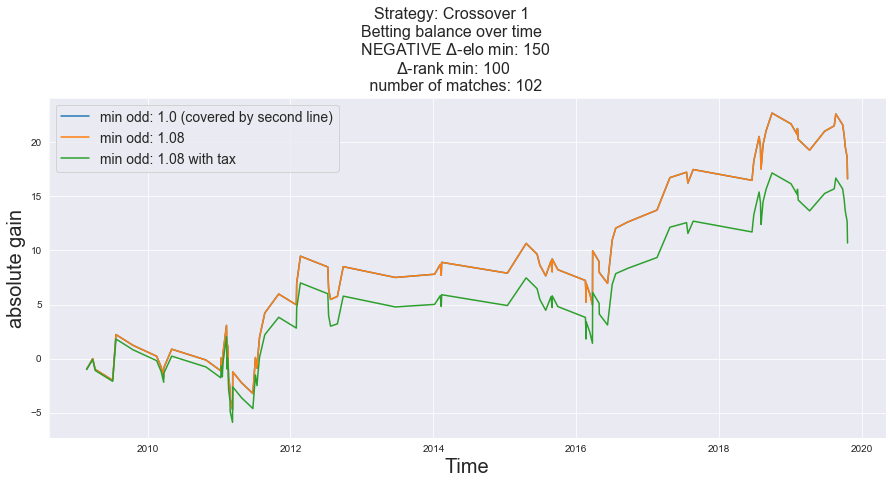

In [67]:
fig, ax = plt.subplots(figsize = (15,7))
ax.plot(gain_data.Date,gain_data.rolling_gain, label =f'min odd: {1.0} (covered by second line)')
ax.plot(gain_data2.Date,gain_data2.rolling_gain, label =f'min odd: {1.08}')
ax.plot(gain_data3.Date,gain_data3.rolling_gain, label =f'min odd: {1.08} with tax')
title = 'Strategy: Crossover 1 \n'\
        f'Betting balance over time \n NEGATIVE $\Delta$-elo min: {checking_elo} \n' \
        f'$\Delta$-rank min: {checking_rank} \n number of matches: {gain_data.shape[0]}\n'
fig.suptitle(title, fontsize = 16)
plt.subplots_adjust(top=0.8)
plt.legend(fontsize = 14)
ax.set_xlabel('Time', fontsize = 20)
ax.set_ylabel('absolute gain', fontsize = 20)

plt.show()
fig_str ='figures/cross_1_over_time.png'  
fig.savefig(fig_str)

In [60]:
for i in range(gain_data3.shape[0]):
    if gain_data3.iloc[i].gain < -0.5:
        gain_data3['right'].iloc[i] = 0
    else:
        gain_data3['right'].iloc[i] = 1

/opt/anaconda3/envs/nf/lib/python3.6/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [59]:
gain_data3.gain.iloc[5]

3.2749999999999995

In [63]:
gain_data3[['Date','Winner','Loser','B365W', 'B365L','gain']].tail(50)
gain_data3.columns
gain_data3['gain'].sum()

10.688999999999993

# other

In [28]:
Y.shape
Z = np.zeros(X.shape)
Z1 = np.zeros(X.shape)

rnd = None

for i,elo in enumerate(x):
    for j, rank in enumerate(y):
        tmp = gain_better(dat, 
                            elo_diff = elo, 
                            rank_diff = rank, 
                            threshold = None, 
                            tax = 0.0, 
                            round_ = rnd,
                            limit = 2000, 
                            verbose=0)
           
        Z[j,i] = tmp[1]
        Z1[j,i] = tmp[0]

/Users/mareknowaczewski/nf-may20/cap_new_2/capstone/Python/eda_func_2.py:90: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  won['B365W_taxed'] = won.B365W*(1-tax)


[ 150.  300.  450.  600.  750.  900. 1050. 1200. 1350.]
[0.0, 1.0, 5.0, 10.0, 20.0, 30.0, 50.0, 100.0, 200.0, 150.0, 300.0, 450.0, 600.0, 750.0, 900.0, 1050.0, 1200.0, 1350.0]
None


"\nchecking_elo = 350\nchecking_rank = 40\n\nplt.plot(checking_elo, checking_rank, 'bX',markersize=22)\nplt.plot([checking_elo, checking_elo],[0,checking_rank],'b--')\nplt.plot([0, checking_elo],[checking_rank,checking_rank],'b--')\n"

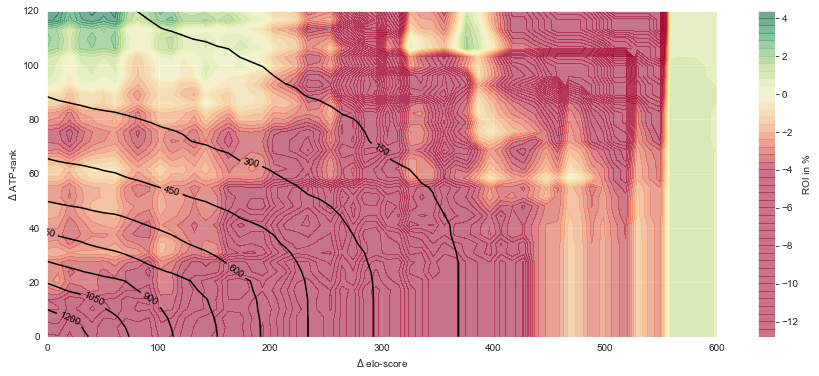

In [168]:
check = 2
#check = Z_res_1.shape[2]-2
Z = Z_res_1[:,:,check]
Z1 = Z_res_2[:,:,check] 

fig, ax = plt.subplots(figsize = (15,6))
CS = ax.contour(X, Y, Z1, 10, colors='black')
print(CS.levels[1:])

levs_new = [0.,1.,5.,10.,20.,30.,50.,100.,200.]
levs_new.extend(CS.levels[1:])
print(levs_new)
levels_new = list(set(levs_new)).sort()
#levels_new = list(set(levs_new.extend(CS.levels[1:])))

print(levels_new)

#levs_new
#del CS
#CS = ax.contour(X, Y, Z1, levs_new, colors='black')


class nf(float):
    def __repr__(self):
        s = f'{self:.1f}'
        return f'{self:.0f}' if s[-1] == '0' else s
    
# Recast levels to new class
CS.levels = [nf(val) for val in CS.levels]

'''
# Label levels with specially formatted floats
if plt.rcParams["text.usetex"]:
    fmt = r'%r \%%'
else:
    fmt = '%r %%'
'''    
fmt = '%r'
ax.clabel(CS, CS.levels, inline=True, fmt=fmt, fontsize=10)
#ax.clabel(CS, CS.levels, inline=True, fontsize=10)


CS3 = ax.contourf(X, Y, Z, 50, cmap='RdYlGn', alpha=0.5)
cb = fig.colorbar(CS3)
cb.set_label('ROI in %')
CS3.set_clim(-4,4)

ax.set_xlabel('$\Delta$ elo-score');
ax.set_ylabel('$\Delta$ ATP-rank');

'''
checking_elo = 350
checking_rank = 40

plt.plot(checking_elo, checking_rank, 'bX',markersize=22)
plt.plot([checking_elo, checking_elo],[0,checking_rank],'b--')
plt.plot([0, checking_elo],[checking_rank,checking_rank],'b--')
'''

In [123]:
levs = CS.levels
levs_new = [0,1,5,10,20,30,50,100,200]
#levs_new.extend(levs[1:])
levs_new.extend(CS.levels[1:])
levels_new = [0,1,5,10,20,30,50,100,200].extend(levs[1:])
#levs_new.extend(levs[1:])
print(levs)
print(levs_new)
print(levels_new)

[0, 600, 1200, 1800, 2400, 3000, 3600, 4200, 4800, 5400, 6000]
[0, 1, 5, 10, 20, 30, 50, 100, 200, 600, 1200, 1800, 2400, 3000, 3600, 4200, 4800, 5400, 6000]
None


In [7]:
#rnd = 0
thr = None
thr2 = 1.08
gain_data = gain_better(dat, 
                    elo_diff = checking_elo, 
                    rank_diff = checking_rank, 
                    threshold = thr, 
                    tax = 0.0, 
                    limit = 2000, 
                    round_=rnd,
                    verbose=1,
                    data_back=1,
                    rst_idx = 1)
gain_data2 = gain_better(dat, 
                    elo_diff = checking_elo, 
                    rank_diff = checking_rank, 
                    threshold = thr2, 
                    tax = 0.0, 
                    limit = 2000, 
                    round_=rnd,
                    verbose=1,
                    data_back=1,
                    rst_idx = 1)

fig, ax = plt.subplots(figsize = (15,7))
ax.plot(gain_data.Date,gain_data.rolling_gain, label =f'min odd: {thr}')
ax.plot(gain_data2.Date,gain_data2.rolling_gain, label =f'min odd: {thr2}')
ax.set_ylabel('ROI absolte €')
ax.set_xlabel('Time')
title = f'Betting balance over time \n $\Delta$-elo min: {checking_elo} \n' \
        f'$\Delta$-rank min: {checking_rank} \n number of matches: {gain_data.shape[0]}\n'\
        f'min odd: {thr}'
fig.suptitle(title, fontsize = 16)
plt.subplots_adjust(top=0.8)
plt.legend()



NameError: name 'checking_elo' is not defined

# Checking crossover 2

In [31]:
x = np.linspace(0, 450, 60) # elo-scores
y = np.linspace(0, 120, 40) # ATP-ranking

#x = np.linspace(0, 100, 60) # elo-scores
#y = np.linspace(0, 30, 40) # ATP-ranking


X, Y = np.meshgrid(x, y)

In [32]:
Y.shape
Z = np.zeros(X.shape)
Z1 = np.zeros(X.shape)

rnd = None

for i,elo in enumerate(x):
    for j, rank in enumerate(y):
        tmp = gain_crossover2(dat, 
                            elo_diff = elo, 
                            rank_diff = rank, 
                            threshold = None, 
                            tax = 0.0, 
                            round_ = rnd,
                            limit = 2000, 
                            verbose=0)
           
        Z[j,i] = tmp[1]
        Z1[j,i] = tmp[0]

/Users/mareknowaczewski/nf-may20/cap_new_2/capstone/Python/eda_func_2.py:317: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  won['B365W_taxed'] = won.B365W*(1-tax)


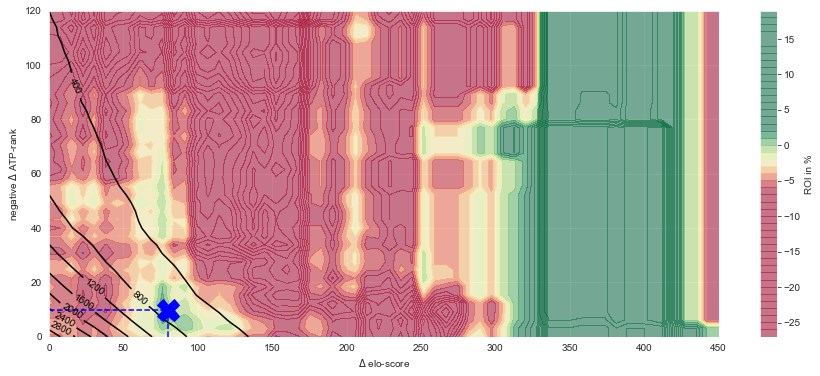

In [33]:
fig, ax = plt.subplots(figsize = (15,6))
CS = ax.contour(X, Y, Z1, 10, colors='black')

class nf(float):
    def __repr__(self):
        s = f'{self:.1f}'
        return f'{self:.0f}' if s[-1] == '0' else s
    
# Recast levels to new class
CS.levels = [nf(val) for val in CS.levels]

'''
# Label levels with specially formatted floats
if plt.rcParams["text.usetex"]:
    fmt = r'%r \%%'
else:
    fmt = '%r %%'
'''    
fmt = '%r'
ax.clabel(CS, CS.levels, inline=True, fmt=fmt, fontsize=10)
#ax.clabel(CS, CS.levels, inline=True, fontsize=10)


CS3 = ax.contourf(X, Y, Z, 50, cmap='RdYlGn', alpha=0.5)
cb = fig.colorbar(CS3)
cb.set_label('ROI in %')
CS3.set_clim(-6,2)

ax.set_xlabel('$\Delta$ elo-score');
ax.set_ylabel('negative $\Delta$ ATP-rank');

checking_elo = 80
checking_rank = 10

plt.plot(checking_elo, checking_rank, 'bX',markersize=22)
plt.plot([checking_elo, checking_elo],[0,checking_rank],'b--')
plt.plot([0, checking_elo],[checking_rank,checking_rank],'b--')

Investment:         654     (Number of matches)
Amount of return:   676.98
Gain:               22.98
Percentage of ROI:  103.51 %
Performance of ROI: 3.51 %


/Users/mareknowaczewski/nf-may20/cap_new_2/capstone/Python/eda_func_2.py:317: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  won['B365W_taxed'] = won.B365W*(1-tax)
/Users/mareknowaczewski/nf-may20/cap_new_2/capstone/Python/eda_func_2.py:345: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  won['gain'] = won.B365W_taxed - 1
/Users/mareknowaczewski/nf-may20/cap_new_2/capstone/Python/eda_func_2.py:346: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

Investment:         654     (Number of matches)
Amount of return:   643.13
Gain:               -10.87
Percentage of ROI:  98.34 %
Performance of ROI: -1.66 %


Text(0, 0.5, 'absolute gain')

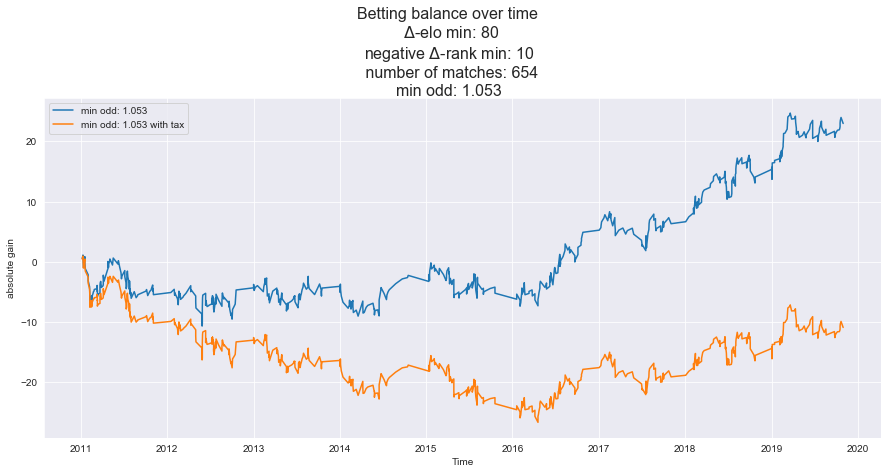

In [22]:
#rnd = 0
tax = 0.05
thr = round(1/(1-tax),3)
#thr = None
#thr2 = 1.08

gain_data = gain_crossover2(dat, 
                    elo_diff = checking_elo, 
                    rank_diff = checking_rank, 
                    threshold = thr, 
                    tax = 0.0, 
                    limit = 2000, 
                    round_=rnd,
                    verbose=1,
                    data_back=1,
                    rst_idx = 1)
gain_data2 = gain_crossover2(dat, 
                    elo_diff = checking_elo, 
                    rank_diff = checking_rank, 
                    threshold = None, 
                    tax = 0.05, 
                    limit = 2000, 
                    round_=rnd,
                    verbose=1,
                    data_back=1,
                    rst_idx = 1)

fig, ax = plt.subplots(figsize = (15,7))
ax.plot(gain_data.Date,gain_data.rolling_gain, label =f'min odd: {thr}')
ax.plot(gain_data2.Date,gain_data2.rolling_gain, label =f'min odd: {thr} with tax')
title = f'Betting balance over time \n $\Delta$-elo min: {checking_elo} \n' \
        f'negative $\Delta$-rank min: {checking_rank} \n number of matches: {gain_data.shape[0]}\n'\
        f'min odd: {thr}'
fig.suptitle(title, fontsize = 16)
plt.subplots_adjust(top=0.8)
plt.legend()
ax.set_xlabel('Time')
ax.set_ylabel('absolute gain')

# Checking crossover 1

In [9]:

x = np.linspace(0, 300, 60) # elo-scores
y = np.linspace(0, 120, 24) # ATP-ranking


X, Y = np.meshgrid(x, y)

In [10]:
Y.shape
Z = np.zeros(X.shape)
Z1 = np.zeros(X.shape)


for i,elo in enumerate(x):
    for j, rank in enumerate(y):
        tmp = gain_crossover(dat, 
                            elo_diff = elo, 
                            rank_diff = rank, 
                            threshold = None, 
                            tax = 0.0, 
                            limit = 2000, 
                            verbose=0)
           
        Z[j,i] = tmp[1]
        Z1[j,i] = tmp[0]


/Users/mareknowaczewski/nf-may20/cap_new_2/capstone/Animated_EDA_plots/eda_func_3.py:210: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  won['B365W_taxed'] = won.B365W*(1-tax)


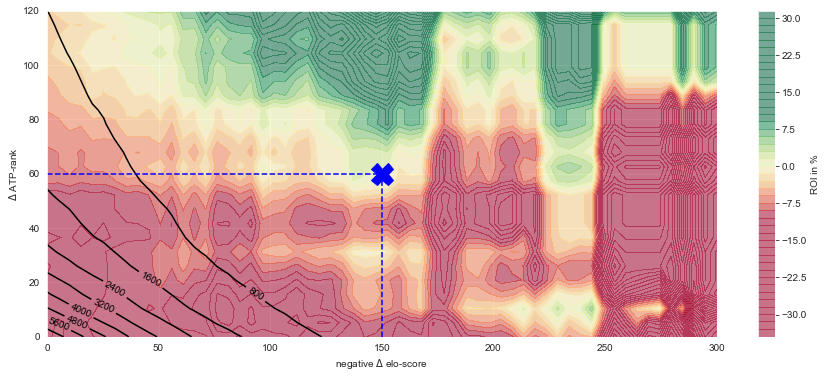

In [11]:
fig, ax = plt.subplots(figsize = (15,6))
CS = ax.contour(X, Y, Z1, 10, colors='black')

class nf(float):
    def __repr__(self):
        s = f'{self:.1f}'
        return f'{self:.0f}' if s[-1] == '0' else s
    
# Recast levels to new class
CS.levels = [nf(val) for val in CS.levels]

'''
# Label levels with specially formatted floats
if plt.rcParams["text.usetex"]:
    fmt = r'%r \%%'
else:
    fmt = '%r %%'
'''    
fmt = '%r'
ax.clabel(CS, CS.levels, inline=True, fmt=fmt, fontsize=10)
#ax.clabel(CS, CS.levels, inline=True, fontsize=10)


CS3 = ax.contourf(X, Y, Z, 50, cmap='RdYlGn', alpha=0.5)
cb = fig.colorbar(CS3)
cb.set_label('ROI in %')
CS3.set_clim(-10,10)

ax.set_xlabel('negative $\Delta$ elo-score');
ax.set_ylabel('$\Delta$ ATP-rank');

checking_elo = 150
checking_rank = 60

plt.plot(checking_elo, checking_rank, 'bX',markersize=22)
plt.plot([checking_elo, checking_elo],[0,checking_rank],'b--')
plt.plot([0, checking_elo],[checking_rank,checking_rank],'b--')

Investment:         140     (Number of matches)
Amount of return:   144.17
Gain:               4.17
Percentage of ROI:  102.98 %
Performance of ROI: 2.98 %


/Users/mareknowaczewski/nf-may20/cap_new_2/capstone/Animated_EDA_plots/eda_func_3.py:210: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  won['B365W_taxed'] = won.B365W*(1-tax)
/Users/mareknowaczewski/nf-may20/cap_new_2/capstone/Animated_EDA_plots/eda_func_3.py:244: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  won['gain'] = won.B365W_taxed - 1
/Users/mareknowaczewski/nf-may20/cap_new_2/capstone/Animated_EDA_plots/eda_func_3.py:245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_

Text(0, 0.5, 'absolute gain')

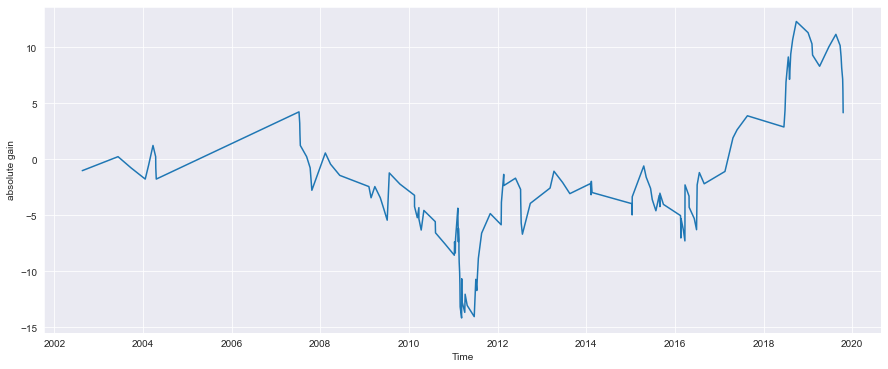

In [12]:
gain_data = gain_crossover(dat, 
                    elo_diff = checking_elo, 
                    rank_diff = checking_rank, 
                    threshold = 1.6, 
                    tax = 0.0, 
                    limit = 2000, 
                    verbose=1,
                    data_back=1,
                    rst_idx = 1)

fig, ax = plt.subplots(figsize = (15,6))
ax.plot(gain_data.Date,gain_data.rolling_gain)

ax.set_xlabel('Time')
ax.set_ylabel('absolute gain')
#plt.plot(dat_21.rolling_gain)

# comparison with kaggle data

In [10]:
data_kag = pd.read_csv('../Generated Data/atp_data_from_kaggle.csv')
data_kag.Date = data_kag.Date.apply(lambda x:datetime.strptime(x, '%Y-%m-%d'))

In [17]:
datk = data_kag[(data_kag.Date.dt.year >= beg_year)]
datk.dropna(inplace = True)

datk['elo_diff'] = datk.elo_winner - datk.elo_loser
datk['rank_diff'] = datk.LRank - datk.WRank
datk['smaller_ps'] = datk[['PSL','PSW']].min(axis=1)
datk['smaller_b365'] = datk[['B365W','B365L']].min(axis=1)

/opt/anaconda3/envs/nf/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/opt/anaconda3/envs/nf/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/opt/anaconda3/envs/nf/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html

In [24]:
Y.shape
Zk = np.zeros(X.shape)
Z1k = np.zeros(X.shape)


for i,elo in enumerate(x):
    for j, rank in enumerate(y):
        tmp = gain_better(datk, 
                            elo_diff = elo, 
                            rank_diff = rank, 
                            threshold = None, 
                            tax = 0.0, 
                            limit = 2000, 
                            verbose=0)
           
        Zk[j,i] = tmp[1]
        Z1k[j,i] = tmp[0]

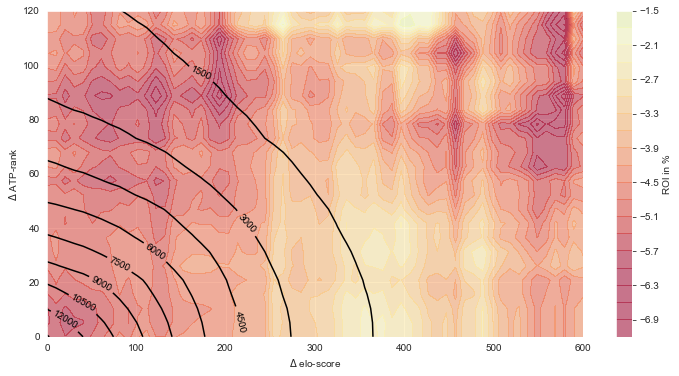

In [25]:
fig, ax = plt.subplots(figsize = (12,6))
CS = ax.contour(X, Y, Z1k, 10, colors='black')

class nf(float):
    def __repr__(self):
        s = f'{self:.1f}'
        return f'{self:.0f}' if s[-1] == '0' else s
    
# Recast levels to new class
CS.levels = [nf(val) for val in CS.levels]

'''
# Label levels with specially formatted floats
if plt.rcParams["text.usetex"]:
    fmt = r'%r \%%'
else:
    fmt = '%r %%'
'''    
fmt = '%r'
ax.clabel(CS, CS.levels, inline=True, fmt=fmt, fontsize=10)
#ax.clabel(CS, CS.levels, inline=True, fontsize=10)


CS3 = ax.contourf(X, Y, Zk, 20, cmap='RdYlGn', alpha=0.5)
cb = fig.colorbar(CS3)
cb.set_label('ROI in %')
CS3.set_clim(-6,2)

ax.set_xlabel('$\Delta$ elo-score');
ax.set_ylabel('$\Delta$ ATP-rank');